In [1]:
'''
This section imports all the modules and 
definitions I commonly use thrroughout most 
notebooks
'''

import sys
sys.path.append('../libraries/')
from libraries_and_definitions import *

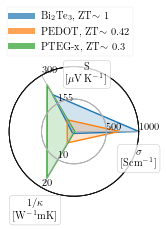

In [3]:
def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=3):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables,zorder=1000)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i],fontsize=10.5, zorder=1000)
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
        
variables = ('',
             '',
             '')
#             "Normal Scale 2", "Normal 3", "Normal 4 %", "Inverted 3 %")
data = (1000, 200, (1/1.2))
data2 =(700,70,(1/0.24))
data3 = (11,250,(1/0.06))
ranges = [(0, 1000), (10, 300), (0.1,20)]
#           (1.7, 4.5), (1.5, 3.7), (70, 87), (100, 10)]       


# plotting
fig1 = plt.figure(figsize=(2, 2))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data, label='Bi$_2$Te$_3$',zorder=-100)
radar.plot(data2,zorder=-100)
radar.plot(data3,zorder=-100)

radar.fill(data, alpha=0.2,zorder=-100)
radar.fill(data2, alpha=0.2,zorder=-100)
radar.fill(data3, alpha=0.2,zorder=-100)


ax=plt.gca()
fig=plt.gcf()

annotate2(ax, 0.2,0.3, '$1/\kappa$ \n $\quad[\mathrm{W}^{-1}\mathrm{m}\mathrm{K}]$', fc='w')
annotate2(ax, 0.6,1.35, '$\mathrm{S}$\n$\quad[\mu\mathrm{V}\,\mathrm{K}^{-1}]$', fc='w')
annotate2(ax, 1,0.7, '$\sigma$\n$\quad[\mathrm{S}\mathrm{cm}^{-1}]$', fc='w')


custom_lines = [Line2D([0], [0], color='tab:blue',alpha= 0.7, lw=6,ls='-', label='Bi$_2$Te$_3$, ZT$\sim$ 1'),
                Line2D([0], [0], color='tab:orange', alpha=0.7, lw=6, ls='-',label='PEDOT, ZT$\sim$ 0.42'),
                Line2D([0], [0], color='tab:green', alpha=0.7, lw=6, ls='-',label='PTEG-x, ZT$\sim$ 0.3')]

ax.legend(handles = custom_lines,loc='upper right', prop={'size': 10.5}, bbox_to_anchor=(1, 1.5));

# fig.savefig('/Users/Zapata/Desktop/radar.svg', bbox_inches='tight')

# fig.savefig('/Users/Zapata/Dropbox/Apps/Overleaf/thesis_OZA (Version 28107)/classicthesis_on_work/gfx/chapter_1/radar_plot.pdf', bbox_inches='tight')

# Wos Search

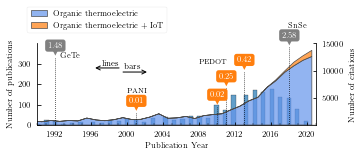

In [2]:
WoS_search_2021 = pd.read_csv("data/WoS_search_2021.csv",index_col=None, header=0) 
WoS_citations = WoS_search_2021.loc[WoS_search_2021.index.repeat(WoS_search_2021['Total Citations'])]

'''
previous file corresponds to a search done in the Web of Science on January 2021

'''

fig = plt.figure(figsize=(5,1.5))

# setting up a subplot within the figure (rows,columns,position)
ax1 = fig.add_subplot(1, 1, 1, ) # yticklabels=[], yticks=[],xticklabels=[], xticks=[]) 
ax2 = fig.add_subplot(1, 1, 1, ) # yticklabels=[], yticks=[],xticklabels=[], xticks=[]) 
ax2.patch.set_alpha(0.)

sns.histplot(data=WoS_search_2021,
             x='Publication Year',
             ax=ax2,
             binwidth=1,
#              discrete=True,
             hue='Search',
             multiple='stack',
             palette=["tab:orange", 'cornflowerblue'],
             edgecolor=".3",
             linewidth=.7,
             element='poly', 
             alpha=0.7,
             legend=True,
#              fill=False
#              log_scale=True,
            )

# sets the name of the inset axes and the parent axes (ax1) 
axins = ax1.inset_axes([0., 0., 1, 1], zorder=-1) #
axins.patch.set_alpha(0.1)

sns.histplot(data=WoS_citations, x='Publication Year', ax=axins,
             kde=False, 
#              hue='Search',
             legend=False,
             palette=["tab:orange", 'tab:blue'],
#              multiple='stack',
             alpha=0.7,
             cumulative=False,
#              element='poly',
#              discrete=True
             
            )

axins.set_xlim(1990,2021)
axins.set_xticks([])
axins.set_xlabel('')
axins.yaxis.tick_right() 
axins.spines['bottom'].set_visible(False)
axins.spines['left'].set_visible(False) 
axins.spines['right'].set_visible(True) 
axins.yaxis.set_label_position("right")
axins.set_ylabel('Number of citations')
axins.set_ylim(1,15000)

labels=('Organic thermoelectric','Organic thermoelectric + IoT' )
ax1.legend(labels=labels,loc='upper left', bbox_to_anchor=(-0.05,1.5))

for axes in [ax1.axes]:
#     axes.patch.set_alpha(0.)
    axes.set_xlim(1990,2021)
    axes.xaxis.set_major_locator(plt.MaxNLocator(9))
    axes.set_ylabel('Number of publications')
    axes.xaxis.set_minor_locator(MultipleLocator(1))

annotate(ax1,2011, 180, '$0.25$', fc='tab:orange')
annotate(ax1,2013, 260, '$0.42$', fc='tab:orange')
annotate(ax1,2010, 90, '$0.02$', fc='tab:orange')
annotate(ax1,2001, 60, '$0.01$', fc='tab:orange')

annotate(ax1,1992, 330, '$1.48$', fc='gray') # DOI: 10.1038/ncomms13901.
annotate(ax1,2018, 380, '$2.58$', fc='gray') # DOI: 10.1038/nature13184

ax1.annotate('GeTe',
            xy=(1992.5, 330), xycoords="data", fontsize=7.5, color= 'k', zorder=1)
ax1.annotate('SnSe',
            xy=(0.9, 1.2), xycoords="axes fraction", fontsize=7.5, color= 'k', zorder=1)
ax1.annotate('PANI',
            xy=(2000, 160), xycoords="data", fontsize=7, color= 'k', zorder=1)
ax1.annotate('PEDOT',
            xy=(2008, 300), xycoords="data", fontsize=7, color= 'k', zorder=1)




ax1.annotate('',
            xy=(0.2, 0.7), xycoords='axes fraction',
            xytext=(0.3,0.7), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",
                            lw=1, color='k'), zorder=0, fontsize=10)

axins.annotate('lines',
            xy=(0.23, 0.73), xycoords="axes fraction", fontsize=8.5, color= 'k', zorder=1)

ax1.annotate('',
            xy=(0.3, 0.65), xycoords='axes fraction',
            xytext=(0.4,0.65), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="<-",
                            lw=1, color='k'), zorder=0, fontsize=10)

axins.annotate('bars',
            xy=(0.31, 0.69), xycoords="axes fraction", fontsize=8.5, color= 'k', zorder=1)

#             xy=(0.6, 1), xycoords="axes fraction", fontsize=10, color= 'k', zorder=1)

        

plt.subplots_adjust(
    wspace = 0.2,  # the amount of width reserved for space between subplots,
                  # expressed as a fraction of the average axis width
    hspace = 0.2  # the amount of height reserved for space between subplots,
)
# fig.savefig('/Users/Zapata/Dropbox/Apps/Overleaf/thesis_OZA (Version 28107)/classicthesis_on_work/gfx/chapter_1/publications.pdf', bbox_inches='tight')


# Current state-of-the-art materals

In [2]:
zt_abundance = pd.read_csv("data/zt_abundance1.csv",index_col=None, header=0)

In [3]:
zt_abundance.head(2)

,Temperature [K],Material,ZT,Major consitituing element,Abundance [kg/kg],Material family,Abundance [ppm]
0,305.764613,MnSi,0.14,Mn,0.00095,Silicide,200000.0
1,363.944746,MnSi,0.19,Mn,0.00095,Silicide,200000.0


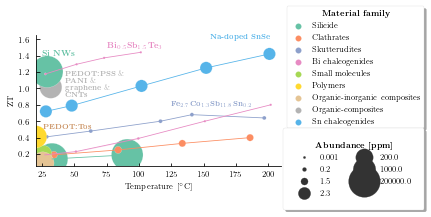

In [4]:
zt_abundance = pd.read_csv("data/zt_abundance1.csv",index_col=None, header=0)
zt_abundance.head(2)


from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
#data import
zt_abundance = pd.read_csv("data/zt_abundance1.csv",index_col=None, header=0)
# setting the whole figure dimensions
fig = plt.figure(figsize=(4.4,2.4),)

# setting up a subplot within the figure (rows,columns,position)
ax1 = fig.add_subplot(1, 1, 1,) # yticklabels=[], yticks=[],xticklabels=[], xticks=[]) 

size=zt_abundance['Abundance [ppm]']

extra=sns.color_palette("colorblind",12)
husl=sns.color_palette("Set2", 9)


sns.scatterplot(data=zt_abundance,x=zt_abundance['Temperature [K]']-273, y='ZT',hue='Material family', marker='o',ax=ax1,
                  size=size,sizes=[5,15,50,150,300, 500,1000],legend=True,
                  palette=[husl[0],husl[1],husl[2],husl[3],husl[4],husl[5],husl[6],husl[7],extra[9]]
                 )


sns.lineplot(data=zt_abundance,x=zt_abundance['Temperature [K]']-273, y='ZT',hue='Material',ax=ax1,legend=False,zorder=1,lw=0.8,
             #palette='husl'
            palette=[husl[0],husl[1],husl[2],husl[3],husl[4],husl[5],husl[6],husl[7],husl[8],husl[3],extra[9],]

            )


# limits, labels, ...
for axes in [ax1.axes]:
    axes.set_xlim(290,490)
    axes.set_xlim(20,210)
#     axes.set_yscale('log')
    axes.set_ylim(0.06,1.65)
#     axes.set_yticks([1E-1,0.01,0.1,1.5])
    axes.set_xlabel('Temperature [$^\circ$C]')
# ax1.set_yticks([1E-1,0.2,1.5])

    
# ax1.legend(loc='upper right',bbox_to_anchor=(1.7,1.15),ncol=1, fontsize=7,labelspacing=0.5)
# ax1.legend(loc='upper left',bbox_to_anchor=(-0.7,1.15),ncol=1, fontsize=7,labelspacing=0.5)

#### annotations
# ax1.annotate('Bi$_{0.5}$Sb$_{1.5}$Te$_3$',
#             xy=(50, 1.5), xycoords="data", fontsize=7, color= husl[3], zorder=1)

text = ax1.text(75,1.5, '\\textbf{Bi$_{0.5}$Sb$_{1.5}$Te$_3$}',
          fontsize=8, color= husl[3], zorder=1,  transform=ax1.transData)
# text.set_path_effects([Stroke(linewidth=0.2, foreground="black"), Normal()])

text = ax1.text(25,1.4, '\\textbf{Si NWs}',
          fontsize=8, color= husl[0], zorder=1,  transform=ax1.transData)
# text.set_path_effects([Stroke(linewidth=0.2, foreground="black"), Normal()])

text = ax1.text(43,0.9, '\\textbf{PEDOT:PSS} \& \n \\textbf{PANI} \& \n \\textbf{graphene} \& \n \\textbf{CNTs}',
          fontsize=7, color= husl[7], zorder=1,  transform=ax1.transData)
# text.set_path_effects([Stroke(linewidth=0.2, foreground="black"), Normal()])

text = ax1.text(155,1.6, '\\textbf{Na-doped SnSe}',
          fontsize=7, color= extra[9], zorder=1,  transform=ax1.transData)
# text.set_path_effects([Stroke(linewidth=0.2, foreground="black"), Normal()])

text = ax1.text(26,0.52, '\\textbf{PEDOT:Tos}',
          fontsize=7, color= extra[5], zorder=1,  transform=ax1.transData, )
# text.set_path_effects([Stroke(linewidth=0.2, foreground="black"), Normal()],)
text = ax1.text(125,0.8, '\\textbf{Fe$_{2.7}$Co$_{1.3}$Sb$_{11.8}$Sn$_{0.2}$}',
          fontsize=7, color= husl[2], zorder=1,  transform=ax1.transData, )


# EXTRACT CURRENT HANDLES AND LABELS
h,l = ax1.get_legend_handles_labels()

# # COLOR LEGEND (FIRST 30 ITEMS)
col_lgd = plt.legend(h[1:10], l[1:10], loc='upper right', 
                     bbox_to_anchor=(1.6,1.25), fancybox=True, shadow=True, ncol=1, title='\\textbf{Material family}')

# # SIZE LEGEND (LAST 5 ITEMS)
size_lgd = plt.legend(h[-7:], l[-7:], loc='lower right', borderpad=1.6,
                      bbox_to_anchor=(1.6,-0.37), fancybox=True, shadow=True, ncol=2, title='\\textbf{Abundance [ppm]}', handletextpad=1)

# # ADD FORMER (OVERWRITTEN BY LATTER)
plt.gca().add_artist(col_lgd)


